# Image Prediction
We want to be able to perform predictions on arbitrary image sizes, but the network has specifically been trained to process 512x512 images. Passing larger images takes up a lot of memory, so I thought that one way to get around that would be to chop up the image into 512x512 pieces, after which each piece is passed through the network and merged together afterwards. The end result is a method that works on arbitrary image sizes. This notebook is primarily for testing that this functionality works as intended.

In [6]:
import os
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 

os.chdir('/home/idl/Documents/InsightProject/genImgInpainting/')

import ImageChunker

# SETTINGS
SAMPLE_IMAGE = 'data/sample_imgs/2371732961.jpg'
MASK_IMAGE = 'examples/center_mask_256.png'
BATCH_SIZE = 4

# Sample Images
These are the images and masks that we will attempt to pass through the network; they are all either too small or too large in one dimension.

In [25]:
SAMPLE_IMAGE.split('/')[-1]

'2371732961.jpg'

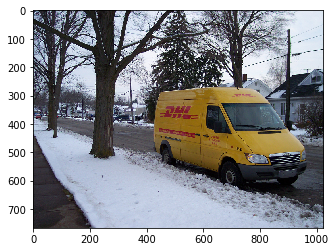

In [33]:
plt.imshow(im)

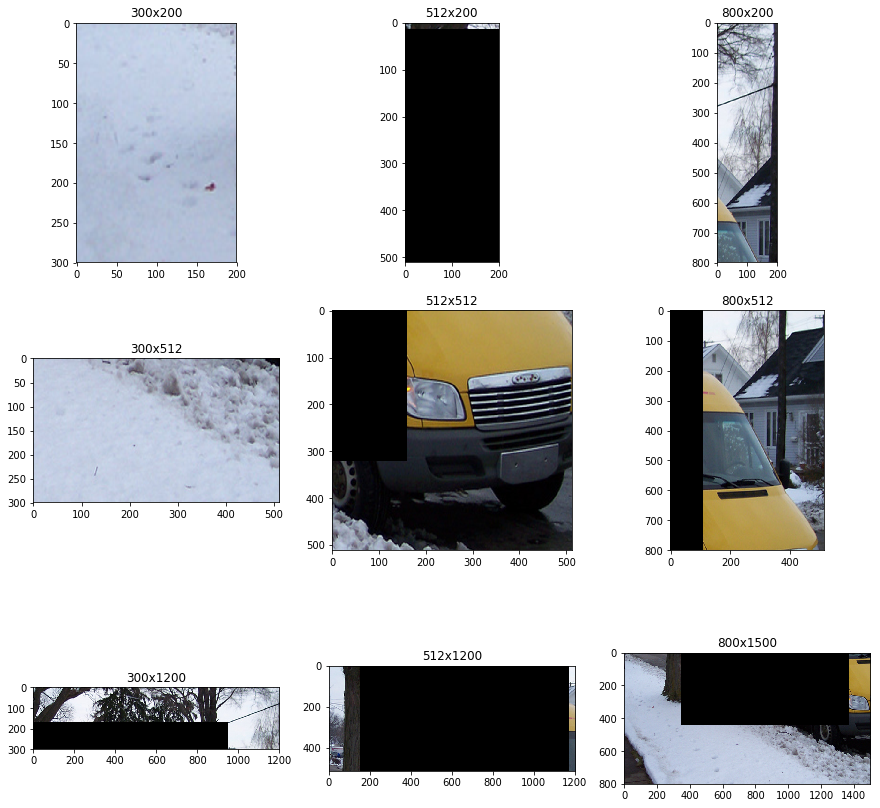

In [35]:
# Image samplings
crops = [
    [300, 200], [512, 200], [800, 200],
    [300, 512], [512, 512], [800, 512],
    [300, 1200], [512, 1200], [800, 1500],
]

# Setup the figure
_, axes = plt.subplots(3, 3, figsize=(15, 15))

# Set random seed
np.random.seed(7)

# Lists for saving images and masks
imgs, masks = [], []

# Plot images
for crop, ax in zip(crops, axes.flatten()):
    
    # Load image
    im = Image.open(SAMPLE_IMAGE).resize((2048, 2048))
    msk_ori = Image.open(MASK_IMAGE).resize((2048, 2048))
    
    # Crop image
    h, w = im.height, im.width
    left = np.random.randint(0, w - crop[1])
    right = left + crop[1]
    upper = np.random.randint(0, h - crop[0])
    lower = upper + crop[0]
    im = im.crop((left, upper, right, lower))

    # Create masked array
    im = np.array(im) / 255
    mask = np.array(msk_ori.crop((left, upper, right, lower))) / 255
    im[mask==1] = 0
    
    # Store for prediction
    imgs.append(im)
    masks.append(mask)

    # Show image
    ax.imshow(im)
    ax.set_title("{}x{}".format(crop[0], crop[1]))

# Model Loading
We'll load the model trained on ImageNet

(767, 1024, 3)
(767, 1024, 3)


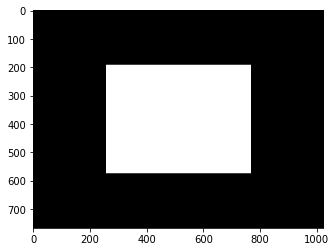

In [13]:
# Load image
im = cv2.imread(SAMPLE_IMAGE)
w, h, chs = im.shape
print(im.shape)
msk_ori = cv2.imread(MASK_IMAGE)
msk_ori = cv2.resize(msk_ori, dsize=(h, w), interpolation=cv2.INTER_AREA)
print(msk_ori.shape)
plt.imshow(msk_ori)

In [23]:
img_ori = cv2.imread(SAMPLE_IMAGE)
img_h, img_w, _ = img_ori.shape
print(img_w, img_h)
# Load mask txt file
bboxes = []
with open('/home/idl/Downloads/generative-inpainting-pytorch/data/sample_imgs/2371732961.txt', 'r') as fd :
    while True:
        line = fd.readline()
        if not line:
            break
        lst = line.rstrip().split(' ')[1:]
        w = int(float(lst[2])*img_w)
        h = int(float(lst[3])*img_h)
        x = int(float(lst[0])*img_w) - w//2
        y = int(float(lst[1])*img_h) - h//2
        bboxes.append([x, y, w, h])
print(bboxes)

1024 767
[[697, 291, 91, 18], [445, 334, 138, 54], [619, 440, 43, 24]]


In [8]:
# Used for chunking up images & stiching them back together
chunker = ImageChunker(256, 256, 20)
chunked_images = chunker.dimension_preprocess(deepcopy(im))
chunked_masks = chunker.dimension_preprocess(deepcopy(msk_ori))
# pred_imgs = model.predict([chunked_images, chunked_masks])
# reconstructed_image = chunker.dimension_postprocess(pred_imgs, img)
for im in chunked_images: 
    print(im.shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


In [71]:
for ii in range(len(chunked_images)) :
    cv2.imwrite(f"/home/idl/Downloads/generative-inpainting-pytorch/data/sample_imgs2/img{ii}.jpg", chunked_images[ii])
    cv2.imwrite(f"/home/idl/Downloads/generative-inpainting-pytorch/data/sample_imgs2/msk{ii}.jpg", chunked_masks[ii])

In [2]:
import glob

fnames = glob.glob("/home/idl/Downloads/generative-inpainting-pytorch/data/sample_imgs2/*.jpg")
for fname in fnames :
    msk = fname.replace('imgs2/img', 'imgs2/msk')
    dest = fname.replace('sample_imgs2/', 'outputs/')
    print(fname, msk, dest)
    msk_img = cv2.imread(msk)
    if np.max(msk_img) == 0 :
        !scp {fname} {dest}
    else :
        !python test_single.py --image {fname}  --mask {msk} --output {dest}

Traceback (most recent call last):
  File "test_single.py", line 5, in <module>
    import torch
ModuleNotFoundError: No module named 'torch'
Traceback (most recent call last):
  File "test_single.py", line 5, in <module>
    import torch
ModuleNotFoundError: No module named 'torch'
Traceback (most recent call last):
  File "test_single.py", line 5, in <module>
    import torch
ModuleNotFoundError: No module named 'torch'
Traceback (most recent call last):
  File "test_single.py", line 5, in <module>
    import torch
ModuleNotFoundError: No module named 'torch'
Traceback (most recent call last):
  File "test_single.py", line 5, in <module>
    import torch
ModuleNotFoundError: No module named 'torch'
Traceback (most recent call last):
  File "test_single.py", line 5, in <module>
    import torch
ModuleNotFoundError: No module named 'torch'
Traceback (most recent call last):
  File "test_single.py", line 5, in <module>
    import torch
ModuleNotFoundError: No module named 'torch'
Traceb